In [1]:
import numpy as np
import pandas as pd

train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

print(train.shape,test.shape)

(357, 11) (90, 10)


In [2]:
full = train.append(test, ignore_index = True)
full.head()

/Users/lyrehee/anaconda2/envs/python36/lib/python3.6/site-packages/pandas/core/frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


,categories,genres,id,is_free,playtime_forever,price,purchase_date,release_date,tags,total_negative_reviews,total_positive_reviews
0,"Single-player,Steam Trading Cards,Steam Cloud","Adventure,Casual,Indie",0,False,0.000000,3700.0,"Jul 2, 2018","10 Dec, 2013","Indie,Adventure,Story Rich,Casual,Atmospheric,...",96.0,372.0
1,"Single-player,Partial Controller Support",RPG,1,True,0.016667,0.0,"Nov 26, 2016","12 Aug, 2015","Mod,Utilities,RPG,Game Development,Singleplaye...",0.0,23.0
2,"Single-player,Full controller support,Steam Tr...","Adventure,Casual,Indie",2,False,0.000000,5000.0,"Jul 2, 2018","28 Jan, 2014","Point & Click,Adventure,Story Rich,Comedy,Indi...",663.0,3018.0
3,"Single-player,Multi-player,Steam Achievements,...","Action,RPG",3,False,1.533333,9900.0,"Nov 28, 2016","31 Mar, 2010","Medieval,RPG,Open World,Strategy,Sandbox,Actio...",1746.0,63078.0
4,"Single-player,Co-op,Steam Achievements,Full co...","Action,Indie,Strategy",4,False,22.333333,4800.0,"Mar 4, 2018","30 Jul, 2012","Tower Defense,Co-op,Action,Strategy,Online Co-...",523.0,8841.0


In [3]:
full['total_negative_reviews']=full['total_negative_reviews'].fillna(full['total_negative_reviews'].mean())
full['total_positive_reviews']=full['total_positive_reviews'].fillna(full['total_positive_reviews'].mean())

In [4]:
import datetime
full['purchase_date'] = pd.to_datetime(full['purchase_date'])
date2=datetime.datetime.strptime('2008-01-01',"%Y-%m-%d")
full['pur_timestamp'] =  full['purchase_date'].apply(lambda x:(x - date2).days)

In [5]:
mean=full.agg({'pur_timestamp':"mean"})
full.fillna(value=mean,inplace=True) 
full.isnull().sum()

categories                 0
genres                     0
id                         0
is_free                    0
playtime_forever          90
price                      0
purchase_date              4
release_date               0
tags                       0
total_negative_reviews     0
total_positive_reviews     0
pur_timestamp              0
dtype: int64

In [6]:
full['release_date'] = pd.to_datetime(full['release_date'])
date2=datetime.datetime.strptime('2008-01-01',"%Y-%m-%d")
full['re_timestamp'] =  full['release_date'].apply(lambda x:(x - date2).days)

In [7]:
full.head()

,categories,genres,id,is_free,playtime_forever,price,purchase_date,release_date,tags,total_negative_reviews,total_positive_reviews,pur_timestamp,re_timestamp
0,"Single-player,Steam Trading Cards,Steam Cloud","Adventure,Casual,Indie",0,False,0.000000,3700.0,2018-07-02,2013-12-10,"Indie,Adventure,Story Rich,Casual,Atmospheric,...",96.0,372.0,3835.0,2170
1,"Single-player,Partial Controller Support",RPG,1,True,0.016667,0.0,2016-11-26,2015-08-12,"Mod,Utilities,RPG,Game Development,Singleplaye...",0.0,23.0,3252.0,2780
2,"Single-player,Full controller support,Steam Tr...","Adventure,Casual,Indie",2,False,0.000000,5000.0,2018-07-02,2014-01-28,"Point & Click,Adventure,Story Rich,Comedy,Indi...",663.0,3018.0,3835.0,2219
3,"Single-player,Multi-player,Steam Achievements,...","Action,RPG",3,False,1.533333,9900.0,2016-11-28,2010-03-31,"Medieval,RPG,Open World,Strategy,Sandbox,Actio...",1746.0,63078.0,3254.0,820
4,"Single-player,Co-op,Steam Achievements,Full co...","Action,Indie,Strategy",4,False,22.333333,4800.0,2018-03-04,2012-07-30,"Tower Defense,Co-op,Action,Strategy,Online Co-...",523.0,8841.0,3715.0,1672


In [8]:
full['timestramp']=full['pur_timestamp']-full['re_timestamp']

In [9]:
full.isnull().sum()

categories                 0
genres                     0
id                         0
is_free                    0
playtime_forever          90
price                      0
purchase_date              4
release_date               0
tags                       0
total_negative_reviews     0
total_positive_reviews     0
pur_timestamp              0
re_timestamp               0
timestramp                 0
dtype: int64

In [10]:
categoriesDf = full["categories"].str.get_dummies("," )

genresDf = full["genres"].str.get_dummies("," )

tagsDf = full["tags"].str.get_dummies("," )

#full = pd.concat([full,categoriesDf],axis = 1)
#full.drop('categories',axis = 1, inplace = True)

categoriesDf = pd.concat([categoriesDf,genresDf],axis = 1)
#full.drop('genres',axis = 1, inplace = True)

#categoriesDf = pd.concat([categoriesDf,tagsDf],axis = 1)
#full.drop('tags',axis = 1, inplace = True)
categoriesDf.head()

,Captions available,Co-op,Commentary available,Cross-Platform Multiplayer,Full controller support,In-App Purchases,Includes Source SDK,Includes level editor,Local Co-op,Local Multi-Player,...,Massively Multiplayer,Nudity,RPG,Racing,Sexual Content,Simulation,Sports,Strategy,Utilities,Violent
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [11]:
full = pd.concat([full,categoriesDf],axis = 1)

In [12]:
full.head()

,categories,genres,id,is_free,playtime_forever,price,purchase_date,release_date,tags,total_negative_reviews,...,Massively Multiplayer,Nudity,RPG,Racing,Sexual Content,Simulation,Sports,Strategy,Utilities,Violent
0,"Single-player,Steam Trading Cards,Steam Cloud","Adventure,Casual,Indie",0,False,0.000000,3700.0,2018-07-02,2013-12-10,"Indie,Adventure,Story Rich,Casual,Atmospheric,...",96.0,...,0,0,0,0,0,0,0,0,0,0
1,"Single-player,Partial Controller Support",RPG,1,True,0.016667,0.0,2016-11-26,2015-08-12,"Mod,Utilities,RPG,Game Development,Singleplaye...",0.0,...,0,0,1,0,0,0,0,0,0,0
2,"Single-player,Full controller support,Steam Tr...","Adventure,Casual,Indie",2,False,0.000000,5000.0,2018-07-02,2014-01-28,"Point & Click,Adventure,Story Rich,Comedy,Indi...",663.0,...,0,0,0,0,0,0,0,0,0,0
3,"Single-player,Multi-player,Steam Achievements,...","Action,RPG",3,False,1.533333,9900.0,2016-11-28,2010-03-31,"Medieval,RPG,Open World,Strategy,Sandbox,Actio...",1746.0,...,0,0,1,0,0,0,0,0,0,0
4,"Single-player,Co-op,Steam Achievements,Full co...","Action,Indie,Strategy",4,False,22.333333,4800.0,2018-03-04,2012-07-30,"Tower Defense,Co-op,Action,Strategy,Online Co-...",523.0,...,0,0,0,0,0,0,0,1,0,0


In [13]:
full.drop(['categories','genres','tags'],axis = 1, inplace = True)

full.head()

,id,is_free,playtime_forever,price,purchase_date,release_date,total_negative_reviews,total_positive_reviews,pur_timestamp,re_timestamp,...,Massively Multiplayer,Nudity,RPG,Racing,Sexual Content,Simulation,Sports,Strategy,Utilities,Violent
0,0,False,0.000000,3700.0,2018-07-02,2013-12-10,96.0,372.0,3835.0,2170,...,0,0,0,0,0,0,0,0,0,0
1,1,True,0.016667,0.0,2016-11-26,2015-08-12,0.0,23.0,3252.0,2780,...,0,0,1,0,0,0,0,0,0,0
2,2,False,0.000000,5000.0,2018-07-02,2014-01-28,663.0,3018.0,3835.0,2219,...,0,0,0,0,0,0,0,0,0,0
3,3,False,1.533333,9900.0,2016-11-28,2010-03-31,1746.0,63078.0,3254.0,820,...,0,0,1,0,0,0,0,0,0,0
4,4,False,22.333333,4800.0,2018-03-04,2012-07-30,523.0,8841.0,3715.0,1672,...,0,0,0,0,0,0,0,1,0,0


In [14]:
#full.drop('Unnamed: 0',axis = 1, inplace = True)


In [15]:
def function(a): 
    if a == 0: 
        return 1
    else: 
        return 0
full['free'] = full['price'].map(lambda x: function(x)) 
full.head()

,id,is_free,playtime_forever,price,purchase_date,release_date,total_negative_reviews,total_positive_reviews,pur_timestamp,re_timestamp,...,Nudity,RPG,Racing,Sexual Content,Simulation,Sports,Strategy,Utilities,Violent,free
0,0,False,0.000000,3700.0,2018-07-02,2013-12-10,96.0,372.0,3835.0,2170,...,0,0,0,0,0,0,0,0,0,0
1,1,True,0.016667,0.0,2016-11-26,2015-08-12,0.0,23.0,3252.0,2780,...,0,1,0,0,0,0,0,0,0,1
2,2,False,0.000000,5000.0,2018-07-02,2014-01-28,663.0,3018.0,3835.0,2219,...,0,0,0,0,0,0,0,0,0,0
3,3,False,1.533333,9900.0,2016-11-28,2010-03-31,1746.0,63078.0,3254.0,820,...,0,1,0,0,0,0,0,0,0,0
4,4,False,22.333333,4800.0,2018-03-04,2012-07-30,523.0,8841.0,3715.0,1672,...,0,0,0,0,0,0,1,0,0,0


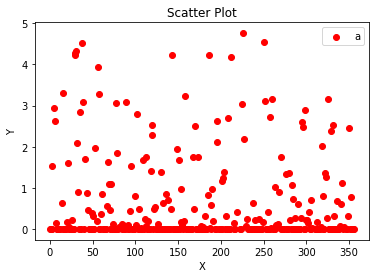

In [17]:
#导入必要的模块  
import numpy as np  
import matplotlib.pyplot as plt  
#产生测试数据  
x = full[full['playtime_forever']<5]['id']
y = full[full['playtime_forever']<5]['playtime_forever']
fig = plt.figure()  
ax1 = fig.add_subplot(111)  
#设置标题  
ax1.set_title('Scatter Plot')  
#设置X轴标签  
plt.xlabel('X')  
#设置Y轴标签  
plt.ylabel('Y')  
#画散点图  
ax1.scatter(x,y,c = 'r',marker = 'o')  
#设置图标  
plt.legend('ax1')  
#显示所画的图  
plt.show()  

In [18]:
full.drop(['is_free','purchase_date','release_date'],axis = 1, inplace = True)

In [19]:
full.head()

,id,playtime_forever,price,total_negative_reviews,total_positive_reviews,pur_timestamp,re_timestamp,timestramp,Captions available,Co-op,...,Nudity,RPG,Racing,Sexual Content,Simulation,Sports,Strategy,Utilities,Violent,free
0,0,0.000000,3700.0,96.0,372.0,3835.0,2170,1665.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0.016667,0.0,0.0,23.0,3252.0,2780,472.0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,2,0.000000,5000.0,663.0,3018.0,3835.0,2219,1616.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,1.533333,9900.0,1746.0,63078.0,3254.0,820,2434.0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,4,22.333333,4800.0,523.0,8841.0,3715.0,1672,2043.0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [20]:
full['playtime_forever']= full['playtime_forever'].apply(lambda x: 0 if x<0.5 else 1 if 0.5<x<1 else 2 if 1<x<5 else 3)

In [21]:
full.head()

,id,playtime_forever,price,total_negative_reviews,total_positive_reviews,pur_timestamp,re_timestamp,timestramp,Captions available,Co-op,...,Nudity,RPG,Racing,Sexual Content,Simulation,Sports,Strategy,Utilities,Violent,free
0,0,0,3700.0,96.0,372.0,3835.0,2170,1665.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0.0,0.0,23.0,3252.0,2780,472.0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,2,0,5000.0,663.0,3018.0,3835.0,2219,1616.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,2,9900.0,1746.0,63078.0,3254.0,820,2434.0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,4,3,4800.0,523.0,8841.0,3715.0,1672,2043.0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [22]:
a = full['playtime_forever']
a = pd.DataFrame(a)

In [23]:
full.drop(['playtime_forever'],axis = 1, inplace = True)

In [24]:
full = pd.concat([full,a],axis = 1)

In [25]:
full

,id,price,total_negative_reviews,total_positive_reviews,pur_timestamp,re_timestamp,timestramp,Captions available,Co-op,Commentary available,...,RPG,Racing,Sexual Content,Simulation,Sports,Strategy,Utilities,Violent,free,playtime_forever
0,0,3700.0,96.0,372.0,3835.0,2170,1665.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0.0,0.0,23.0,3252.0,2780,472.0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,2,5000.0,663.0,3018.0,3835.0,2219,1616.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,9900.0,1746.0,63078.0,3254.0,820,2434.0,0,0,0,...,1,0,0,0,0,0,0,0,0,2
4,4,4800.0,523.0,8841.0,3715.0,1672,2043.0,0,1,0,...,0,0,0,0,0,1,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442,85,5000.0,516.0,9334.0,3734.0,1968,1766.0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
443,86,3600.0,176.0,1245.0,3714.0,622,3092.0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
444,87,11200.0,6350.0,33128.0,3701.0,2051,1650.0,0,0,0,...,0,0,0,1,0,1,0,0,0,3
445,88,0.0,0.0,5.0,3610.0,3457,153.0,0,1,0,...,1,0,0,1,1,1,0,0,1,3


In [26]:
source_x = full.iloc[0:357,:57]
source_y = full.loc[0:356,"playtime_forever"]

In [27]:
source_x

,id,price,total_negative_reviews,total_positive_reviews,pur_timestamp,re_timestamp,timestramp,Captions available,Co-op,Commentary available,...,Nudity,RPG,Racing,Sexual Content,Simulation,Sports,Strategy,Utilities,Violent,free
0,0,3700.0,96.0,372.0,3835.0,2170,1665.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0.0,0.0,23.0,3252.0,2780,472.0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,2,5000.0,663.0,3018.0,3835.0,2219,1616.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,9900.0,1746.0,63078.0,3254.0,820,2434.0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,4,4800.0,523.0,8841.0,3715.0,1672,2043.0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,352,8800.0,91.0,150.0,3615.0,3276,339.0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
353,353,6800.0,4849.0,19008.0,3879.0,2730,1149.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
354,354,8300.0,1719.0,5099.0,3682.0,2865,817.0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
355,355,6800.0,159.0,718.0,3553.0,3076,477.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(source_x,source_y,train_size=.8)
print(source_x.shape,train_x.shape,test_x.shape)

(357, 57) (285, 57) (72, 57)


In [57]:
from sklearn.ensemble import GradientBoostingClassifier  
gbc = GradientBoostingClassifier(n_estimators=200)  
gbc.fit(train_x, train_y) 

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [58]:
gbc.score(test_x,test_y)

0.6111111111111112

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.externals import joblib
#from scipy import interp
lr_clf = LogisticRegression(random_state=0, solver='sag',multi_class='ovr', verbose = 1)
lr_clf.fit(train_x, train_y)
#print 'all tasks done. total time used:%s s.\n\n'%((datetime.now() - btime).total_seconds())

# 1、AUC
y_pred_pa = lr_clf.predict_proba(test_x)
y_test_oh = label_binarize(test_y, classes=[0,1,2,3])
print ('调用函数auc：', roc_auc_score(y_test_oh, y_pred_pa, average='micro'))

max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
调用函数auc： 0.8011831275720166


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/lyrehee/anaconda2/envs/python36/lib/python3.6/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished


In [71]:
lr_clf.score(test_x,test_y)

0.6388888888888888

In [61]:
pred = full.iloc[357:,:57]

In [62]:
result1 =lr_clf.predict(pred)

In [63]:
predictions=list(result1)

In [64]:
for i in range(len(predictions)):
    if predictions[i] == 1:
        predictions[i] = 0.7
    if predictions[i] == 3:
        predictions[i] = 8



In [65]:
subm = pd.read_csv("samplesubmission.csv")
subm.drop("playtime_forever",axis = 1,inplace = True)
list1 = pd.DataFrame(predictions)
result = pd.concat([subm,list1],axis = 1)
result.columns = ['id','playtime_forever']
result

,id,playtime_forever
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
85,85,0
86,86,0
87,87,0
88,88,0


In [69]:
result.to_csv("result.csv",index = False)

In [68]:
joblib.dump(lr_clf, 'lr_clf.pkl')

['lr_clf.pkl']

In [73]:
data = joblib.load('lr_clf.pkl')

In [75]:
result1 =data.predict(pred)

In [77]:
test = pd.read_csv('./test.csv')

In [78]:
a = pd.merge(test,result)

In [80]:
a.to_csv("./result/test.csv")